In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt

In [40]:
# from learntools.core import binder
# binder.bind(globals())
# from learntools.computer_vision.ex5 import *

In [2]:
import tensorflow as tf

In [ ]:
#Set reproducability here?

In [10]:
#Get current working directory
os.getcwd()

'C:\\Users\\Harrison\\Documents\\Python\\PetFinder'

## **Image Preprocessing**

In [3]:
train_labels = pd.read_csv("C:/Users/Harrison/Documents/Python/PetFinder/petfinder-pawpularity-score/train.csv")
test_labels = pd.read_csv("C:/Users/Harrison/Documents/Python/PetFinder/petfinder-pawpularity-score/test.csv")

train_labels.head(5)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [38]:
sample_sub = pd.read_csv("C:/Users/Harrison/Documents/Python/PetFinder/petfinder-pawpularity-score/sample_submission.csv")
sample_sub.head(10)

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,67.75
1,43a2262d7738e3d420d453815151079e,59.15
2,4e429cead1848a298432a0acad014c9d,20.02
3,80bc3ccafcc51b66303c2c263aa38486,94.53
4,8f49844c382931444e68dffbe20228f4,89.82
5,b03f7041962238a7c9d6537e22f9b017,65.50
6,c978013571258ed6d4637f6e8cc9d6a3,71.42
7,e0de453c1bffc20c22b072b34b54e50f,5.85


In [34]:
#Load the images into a dataset
#Image size default is 256*256..

image_train_ = tf.keras.utils.image_dataset_from_directory(
    directory='C:/Users/Harrison/Documents/Python/PetFinder/petfinder-pawpularity-score/train/',
    #Want to attach score rather than a label to the dataset here
    label_mode=None,
    #label_mode="int",
    image_size=[256,256],
    #interpolation='nearest',
    batch_size=64,
    #shuffle=True,
    )

# image_test_ = image_dataset_from_directory(
#     'C:/Users/Harrison/Documents/Python/PetFinder/petfinder-pawpularity-score/train.csv',
#     labels='inferred',
#     label_mode='binary',
#     image_size=[128,128],
#     interpolation='nearest',
#     batch_size=64,
#     shuffle=True,
#     )

Found 9912 files belonging to 1 classes.


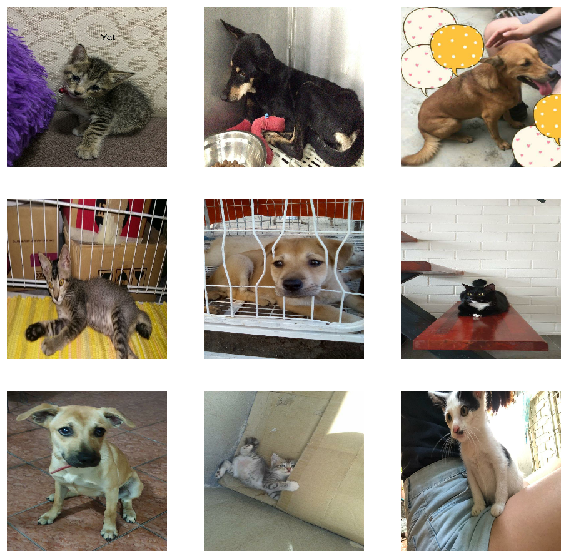

In [35]:
plt.figure(figsize=(10,10))
for images in image_train_.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [22]:
def convert_to_float(image):
    image=tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data = (
    image_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE))

# ds_valid = (
#     ds_valid_
#     .map(convert_to_float)
#     .cache()
#     .prefetch(buffer_size=AUTOTUNE))

In [42]:
train_data

<PrefetchDataset shapes: (None, 128, 128, 3), types: tf.float32>

## **Model Specification**

In [28]:
#The CNN model to use will go here, just lifted Kaggle example for now

from tensorflow.keras import layers

model=tf.keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

## **Model Training**

In [ ]:
#Model training

## **Model Evaluation**

In [ ]:
#Model evaluation